In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv") #veri seti DataFrame'e yüklendi.

In [3]:
df = df_train.copy() #yapılan değişikliklerin orjinal veri setini etkilememesi için bir kopyası oluşturuldu

In [4]:
df.head() #veri setinin ilk 5 satırını getirir

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info() #veri setindeki sütun isimleri, veri tipleri ve eksik değerler gibi bilgileri verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.shape #veri setinin satır ve sütun sayısını verir

(103904, 25)

In [7]:
df.columns #veri setindeki sütun isimlerini getirir

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df.describe().T #sayısal sütunlar için ortalama, min, max gibi istatistikleri verir
#.T ile istatistiklerin dikeyde görünmesi sağlandı

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


**İSTATİSTİKSEL ÖZET**

In [9]:
df["Age"].mean() #yaş ortalaması hesaplandı

39.379706267323684

In [10]:
df["Age"].std() #Age sütununun standart sapması hesaplandı

15.114963699738569

In [11]:
df["Age"].median() #Age sütunundaki ortanca değer hesaplandı

40.0

In [12]:
df["Age"].min() #en küçük yaş değeri hesaplandı

7

In [13]:
df["Age"].max() #en büyük yaş değeri hesaplandı

85

In [14]:
df["Flight Distance"].mean() #ortalama uçuş mesafesi hesaplandı

1189.4483754234677

In [15]:
df["Flight Distance"].min() #minimum uçuş mesafesi hesaplandı

31

In [16]:
df["Flight Distance"].max() #maximum uçuş mesafesi hesaplandı

4983

In [17]:
df["Baggage handling"].mean() #ortalama bagaj işlemleri memnuniyeti hesaplandı

3.6318332306744687

In [18]:
df["Baggage handling"].std() #bagaj işlemleri skorlarının değişkenliği hesaplandı

1.1809034110757668

In [19]:
df["Ease of Online booking"].mean() #online rezervasyon kolaylığı ortalaması hesaplandı

2.7569006005543577

In [20]:
df["Ease of Online booking"].std() #skorların ne kadar dağıldığı hesaplandı

1.3989294726592196

In [21]:
women = df.loc[df["Gender"] == "Female"]
women["Age"].mean() #kadınların yaş ortalaması hesaplandı

39.2467616211808

In [22]:
man = df.loc[df["Gender"] == "Male"]
man["Age"].mean() #erkeklerin yaş ortalaması hesaplandı

39.516677413681926

In [23]:
man["Seat comfort"].mean() #erkeklerin koltuk konforundaki memnuniyeti hesaplandı

3.4039119135549174

In [24]:
women["On-board service"].mean() #kadınların uçak içi hizmetlerden memnuniyet ortalaması hesaplandı

3.3720105448821287

In [25]:
loyal = df.loc[df["Customer Type"] == "Loyal Customer"]
loyal["Age"].mean() #sadık müşterilerin yaş ortalaması hesaplandı

41.392496732333996

In [26]:
loyal["Food and drink"].mean() #sadık müşterilerin yiyecek ve içeceklerden memnuniyet ortalaması hesaplandı

3.2394993111406802

**EKSİK DEĞER ANALİZİ** 

Eksik değer, bir veri setinde bazı gözlemlerde ilgili özellik için veri bulunmaması durumudur. Veri toplama sırasında hata veya ihmal, verinin kaybolması veya bozulması gibi sebeplerden oluşur. Eksik değerlerin çözümü için:

1- Eksik veri kaldırılabilir.

2- Eksik veri doldurulabilir. Bunun için birkaç yol vardır:
    
    * Eksik değerler sabit bir değerle (0,-1 vs) doldurulabilir.
    
    * Sayısal veriler ortalama veya medyanla, kategorik veriler mod ile doldurulabilir.
    
    * Eksik değer KNN gibi makine öğrenmesi modelleri ile tahmin edilerek doldurulabilir.



In [27]:
df.isnull().sum() #her bir sütundaki eksik değerlerin toplam sayısını hesaplar

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [28]:
df["Arrival Delay in Minutes"].isnull().sum() #Arrival Delay in Minutes sütunundaki eksik değerlerin sayısını yazdırır

310

<Axes: >

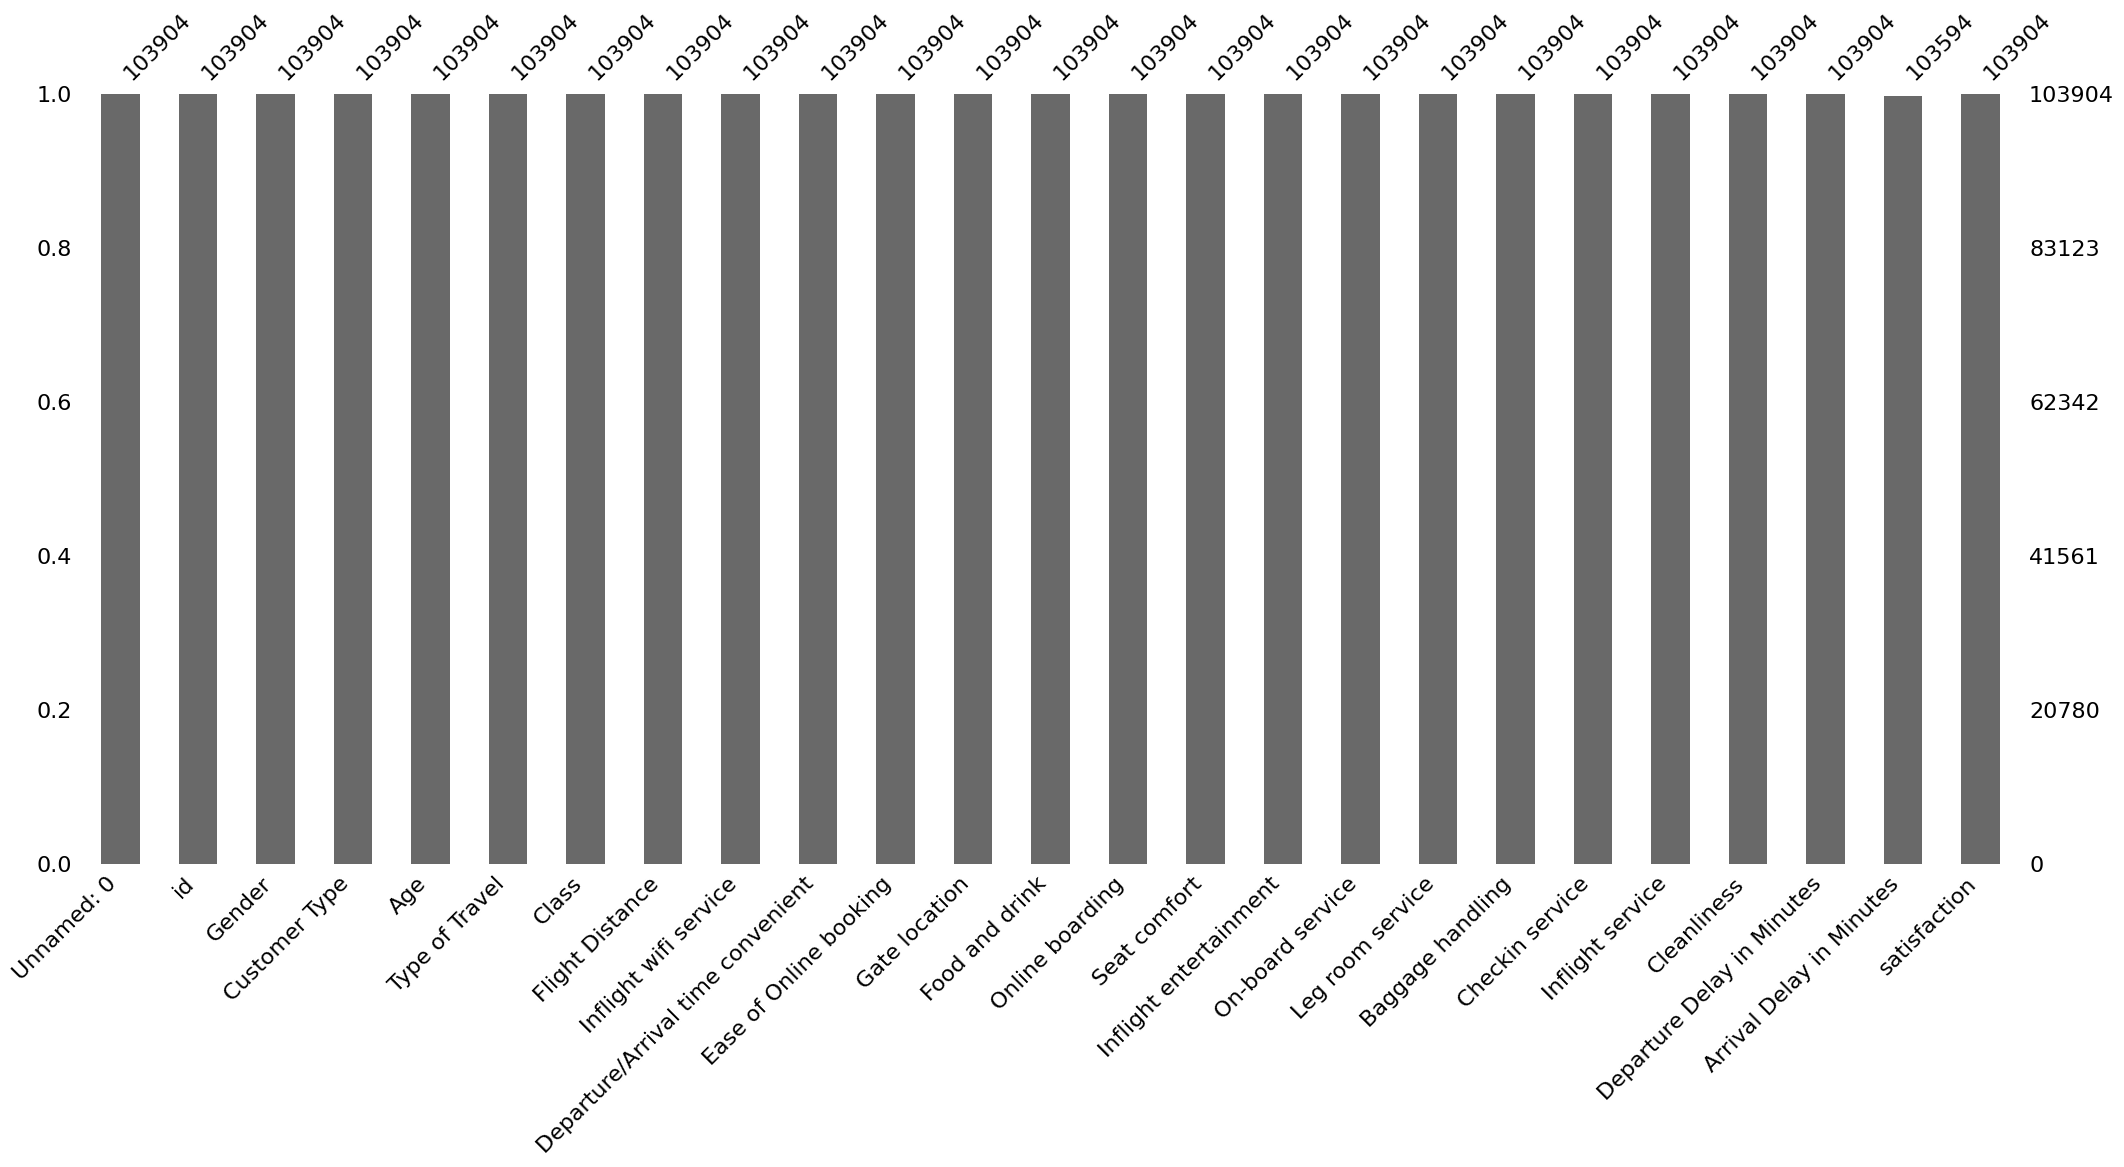

In [29]:
import missingno as msno #eksik değerleri göstermek için missingno kütüphanesi kullanıldı
msno.bar(df) #veri setindeki eksik değerlerin dağılımı çubuk grafikle gösterildi

*Çubuk grafiğinde de görüldüğü gibi, Arrival Delay in Minutes sütununda 310 tane veri eksik. Bu veri setinde eksik verilerin sayısı az olduğu için ve bir modelleme yapılmayacağı için veriler direkt olarak silindi.*

In [30]:
df = df.dropna(subset=['Arrival Delay in Minutes']) #eksik değerler silindi

In [31]:
df["Arrival Delay in Minutes"].isnull().sum() #eksik değerler silindikten sonra tekrar kontrol edildi

0

**AYKIRI DEĞER (OUTLİER) ANALİZİ**

Aykırı değer, gözlemlerin genel deseninden önemli ölçüde sapmış olan verilere verilen addır. Ölçüm hataları, veri giriş hataları veya doğal uç durumlar buna sebep olabilir. Aykırı değerleri belirlemek için kullanılan yöntemler şunlardır:

1- Boxplot (Kutu Grafiği)

    * IQR (Interquartile Range) yöntemi kullanılır.
    
2- Z-Score Yöntemi

3- Görselleştirme

4- Machine Learning Tabanlı Yöntemler

Aykırı değerler veri setinden çıkarılabilir, dönüştürülebilir veya doğruysa olduğu gibi bırakılabilir.

In [90]:
import pandas as pd

#sadece sayısal sütunları içeren DataFrame oluşturuldu
numeric_df = df.select_dtypes(include=['int64', 'float64']) 

print("Aykırı Değer Sayısı:\n")

#her sütun için aykırı değer analizi yapıldı
for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR #alt sınır
    upper_bound = Q3 + 1.5 * IQR #üst sınır
    
    # Aykırı değerlerin sayısını bul
    outlier_count = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)].shape[0]
    
    if outlier_count > 0:
        print(f"{column}: {outlier_count} aykırı değer")


Aykırı Değer Sayısı:

Flight Distance: 2287 aykırı değer
Checkin service: 12853 aykırı değer
Departure Delay in Minutes: 14428 aykırı değer
Arrival Delay in Minutes: 13954 aykırı değer


<Axes: xlabel='Checkin service'>

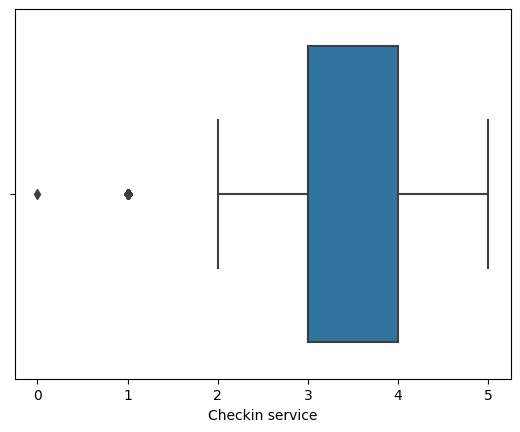

In [88]:
#Görselleştirme için gerekli kütüphaneler içe aktarıldı
import matplotlib.pyplot as plt #grafik çizimi için temel kütüphane
import seaborn as sns #istatistiksel grafikler için geliştirilmiş kütüphane

#Age sütununun aykırı değerlerini görselleştirmek için kutu grafiği kullanıldı
sns.boxplot(x=df["Checkin service"],data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


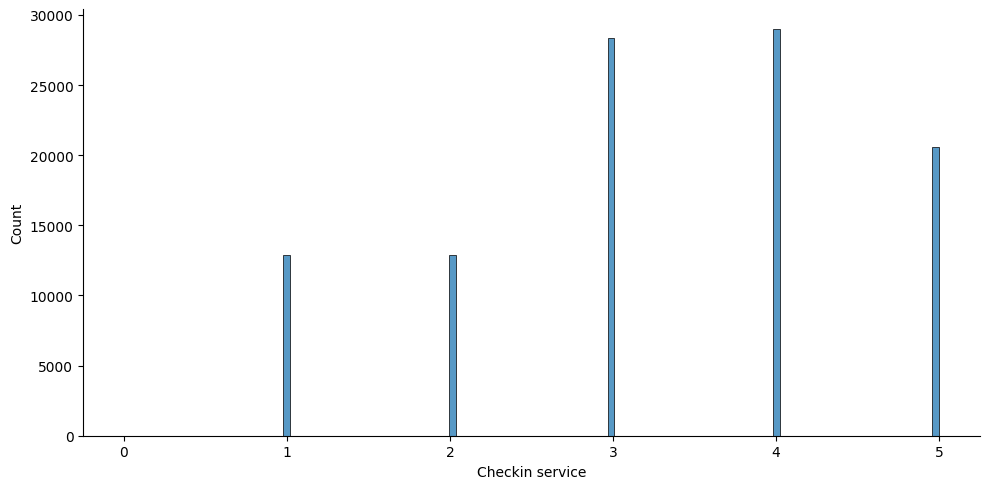

In [89]:
#Age sütununun dağılımı histogram olarak görselleştirildi
sns.displot(df["Checkin service"], aspect=2)

<Axes: xlabel='Flight Distance'>

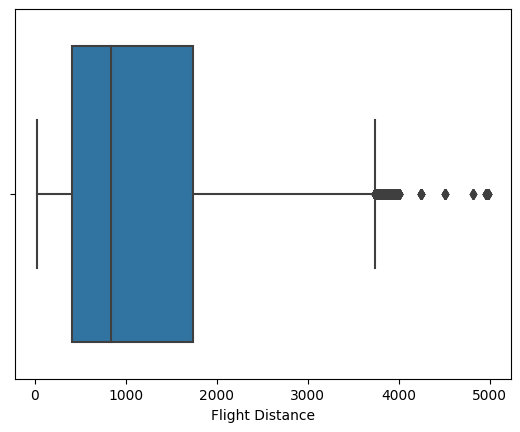

In [36]:
#Flight Distance sütununun aykırı değerlerini görselleştirmek için kutu grafiği kullanıldı
sns.boxplot(x=df["Flight Distance"],data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


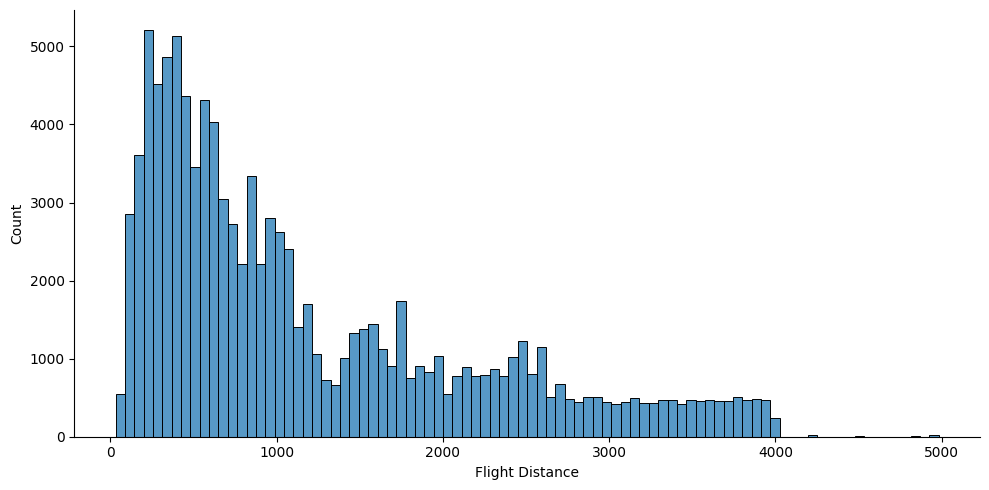

In [37]:
#Flight Distance sütununun dağılımı histogram olarak görselleştirildi
sns.displot(df["Flight Distance"], aspect=2)

<Axes: xlabel='Departure Delay in Minutes'>

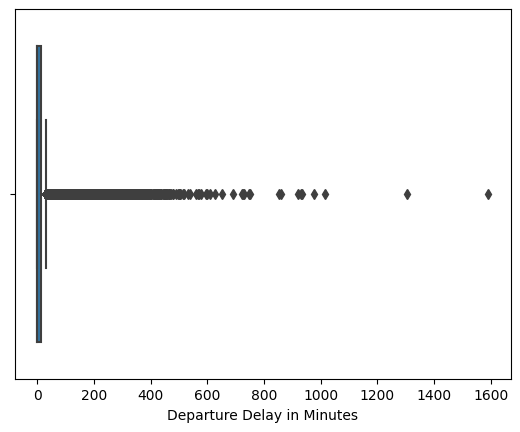

In [39]:
#Departure Delay in Minutes sütununun aykırı değerlerini görselleştirmek için kutu grafiği kullanıldı
sns.boxplot(x=df["Departure Delay in Minutes"],data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


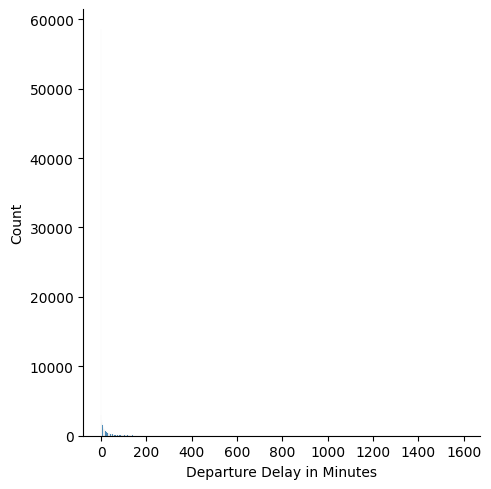

In [40]:
#Departure Delay in Minutes sütununun dağılımı histogram olarak görselleştirildi
sns.displot(df["Departure Delay in Minutes"], aspect=1)

<Axes: xlabel='Arrival Delay in Minutes'>

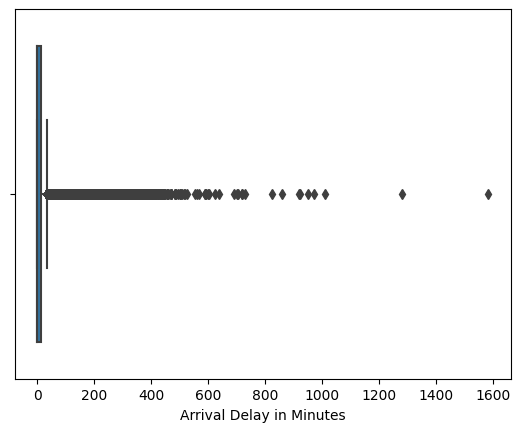

In [42]:
#Arrival Delay in Minutes sütununun aykırı değerlerini görselleştirmek için kutu grafiği kullanıldı
sns.boxplot(x=df["Arrival Delay in Minutes"],data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


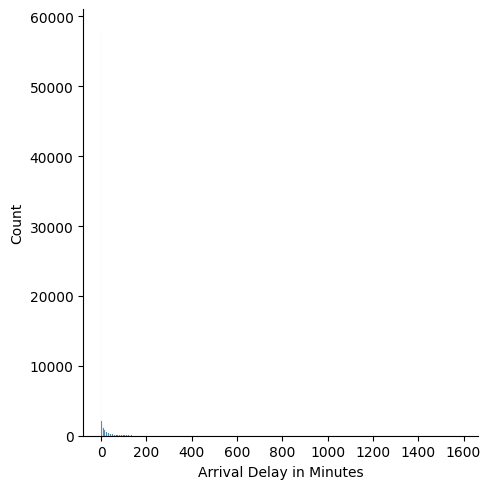

In [43]:
#Arrival Delay in Minutes sütununun dağılımı histogram olarak görselleştirildi
sns.displot(df["Arrival Delay in Minutes"], aspect=1)

*IQR yöntemi ve grafikler sonucunda aşağıdaki sonuçlara ulaşılmıştır:*

    
    Flight Distance: 2287 aykırı değer  
    Checkin service: 12853 aykırı değer    
    Departure Delay in Minutes: 14428 aykırı değer  
    Arrival Delay in Minutes: 13954 aykırı değer

*En fazla aykırı değer Departure Delay in Minutes sınıfında görülürken, en az aykırı değer Flight Distance sınıfında görülmüştür. Bu 4 sınıf haricinde diğer sınıflarda herhangi bir aykırı değer bulunmamaktadır.*

**GÖRSELLEŞTİRME**

Görselleştirme, verileri grafikler, tablolar veya görsel öğeler kullanarak anlaşılır ve yorumlanabilir hale getirme işlemidir. 

*Veri Görselleştirme Türleri*

1- Tek değişkenli (Univariate) görselleştirmeler: Yalnızca bir değişkenin dağılımını inceler.

    * Histogram: Sayısal verinin frekans dağılımını gösterir.

    * Bar plot (çubuk grafik): Kategorik verilerin frekansını gösterir.

    * Box plot (kutu grafiği): Verinin çeyreklerini ve aykırı değerlerini gösterir.

    * Pie chart (pasta grafiği): Kategorilerin oranlarını gösterir.

2- İki Değişkenli (Bivariate) Görselleştirmeler: İki değişken arasındaki ilişkiyi gösterir.

    * Scatter plot (dağılım grafiği): İki sayısal değişken arasındaki ilişki.

    * Line plot (çizgi grafiği): Zaman serileri gibi ardışık veriler için uygundur.

    * Grouped bar plot: Bir kategorik, bir sayısal değişken için gruplandırılmış çubuklar.

3- Çok Değişkenli (Multivariate) Görselleştirmeler: Üç veya daha fazla değişkeni aynı anda gösterir.

    * Heatmap (ısı haritası): Korelasyon gibi matris verilerini görselleştirir.

    * Pair plot: Sayısal sütunlar arasında tüm olası ikili ilişkileri gösterir.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

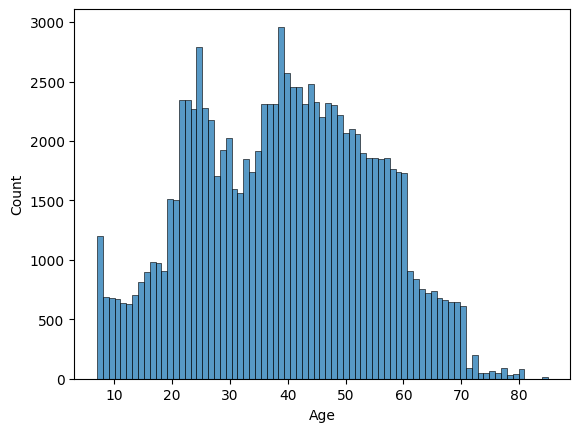

In [44]:
#Age sütununun histogramı çizildi
sns.histplot(df['Age'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flight Distance', ylabel='Count'>

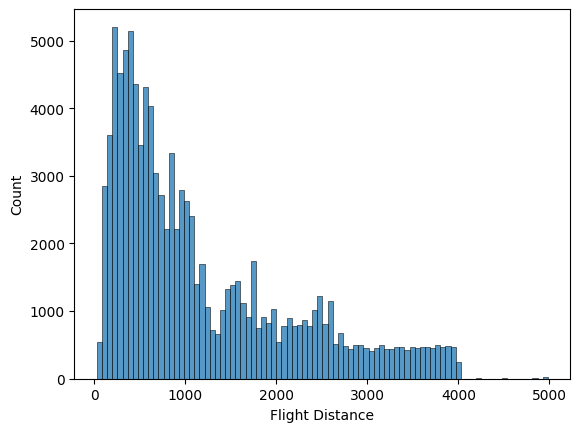

In [45]:
#Flight Distance sütununun histogramı çizildi
sns.histplot(df['Flight Distance'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

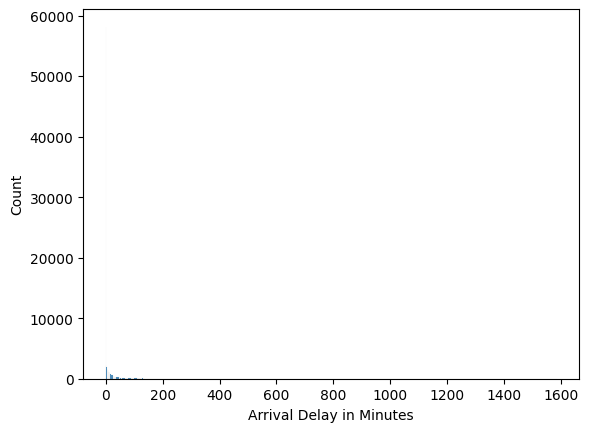

In [46]:
#Arrival Delay in Minutes sütununun histogramı çizildi
sns.histplot(df['Arrival Delay in Minutes'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

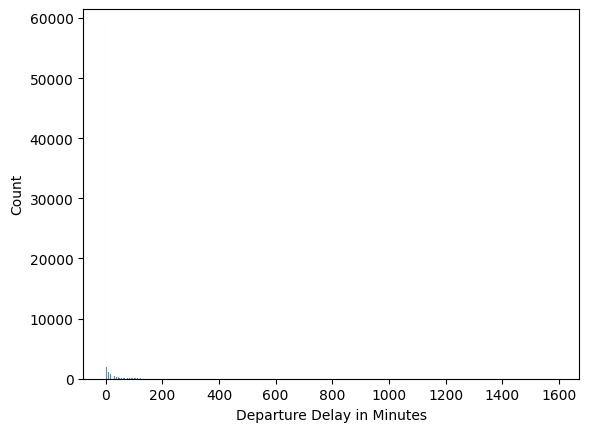

In [47]:
#Departure Delay in Minutes sütununun histogramı çizildi
sns.histplot(df['Departure Delay in Minutes'])

In [48]:
#Class sütunundaki her bir sınıfın kaç kez tekrarlandığı hesaplandı
df["Class"].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


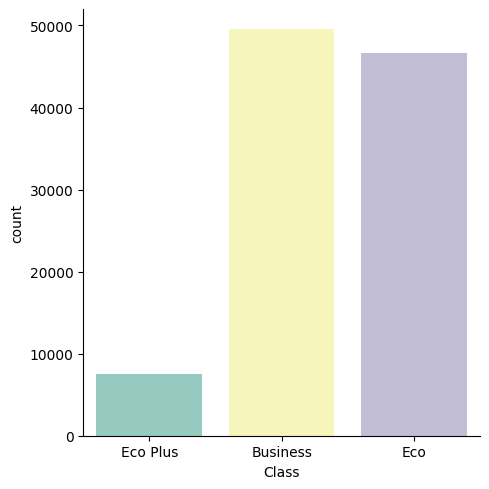

In [49]:
#Class sütunundaki her sınıfın sayısını gösteren çubuk grafiği oluşturuldu
sns.catplot(x="Class",kind="count",data=df, palette = "Set3")

*Grafiğe bakıldığında class sınıfındaki en fazla verinin Business Class olduğu görülmektedir. Eco buna yakın bir oranla seyretmektedir. Eco Plus ise en az tekrarlanan veridir.*

In [50]:
#Customer Type sütunundaki her bir sınıfın kaç kez tekrarlandığı hesaplandı
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


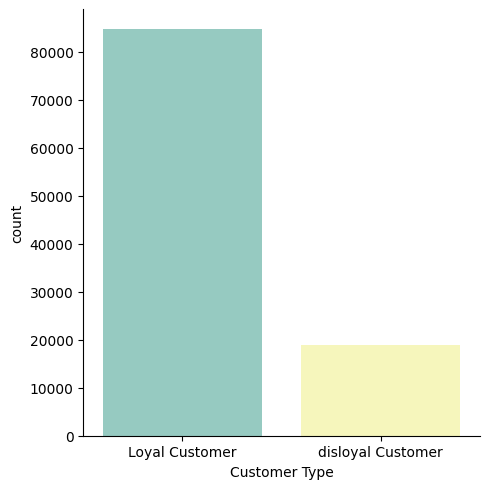

In [51]:
#Customer Type sütunundaki her sınıfın sayısını gösteren çubuk grafiği oluşturuldu
sns.catplot(x="Customer Type",kind="count",data=df, palette = "Set3")

*Grafiğe bakıldığında sadık müşterilerin sadık olmayan müşterilere oranla oldukça yüksek sayıda bulunduğu görülmektedir.*

In [52]:
#Ease of Online booking sütunundaki her bir sınıfın kaç kez tekrarlandığı hesaplandı
df["Ease of Online booking"].value_counts()

Ease of Online booking
3    24370
2    23962
4    19508
1    17466
5    13815
0     4473
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


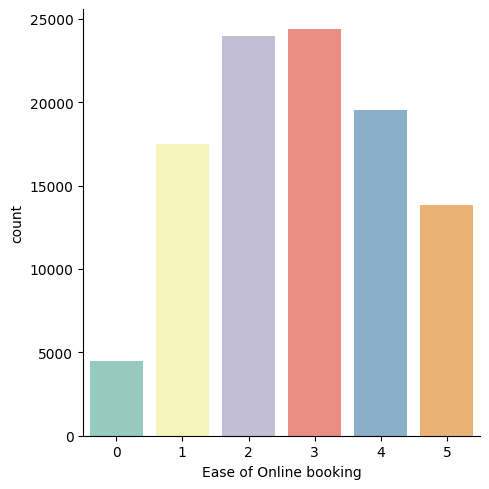

In [53]:
#Ease of Online booking sütunundaki her sınıfın sayısını gösteren çubuk grafiği oluşturuldu
sns.catplot(x="Ease of Online booking", kind="count",data=df, palette = "Set3")

*Grafiğe bakıldığında çevrimiçi rezervasyon kolaylığındaki oranın 2-3 puan aralığında en yüksek olduğu görülmektedir. 0 puan verenlerin sayısı diğer puanlara göre daha az olsa da azımsanmayacak kadar fazladır.*

In [54]:
#Baggage handling sütunundaki her bir sınıfın kaç kez tekrarlandığı hesaplandı
df["Baggage handling"].value_counts()

Baggage handling
4    37274
5    27047
3    20567
2    11483
1     7223
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


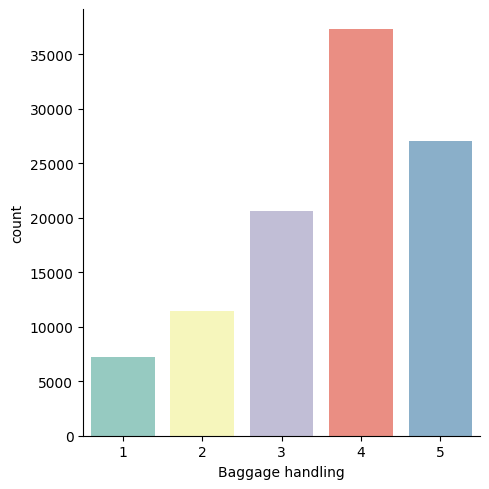

In [55]:
#Baggage handling sütunundaki her sınıfın sayısını gösteren çubuk grafiği oluşturuldu
sns.catplot(x="Baggage handling", kind="count", data=df, palette = "Set3")

*Grafiğe bakıldığında bagaj işlemlerinde 4 puan verenlerin sayısının en yüksek olduğu görünmektedir. 1 puan verenlerin sayısı ise diğer puanlara göre daha azdır.*

In [56]:
#Type of Travel ve Gender sütunlarına göre gruplanarak, her grup için id sütunundaki kayıt sayıları hesaplandı
df.groupby(["Type of Travel","Gender"], as_index=False)["id"].count()

,Type of Travel,Gender,id
0,Business travel,Female,36433
1,Business travel,Male,35032
2,Personal Travel,Female,16143
3,Personal Travel,Male,15986


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


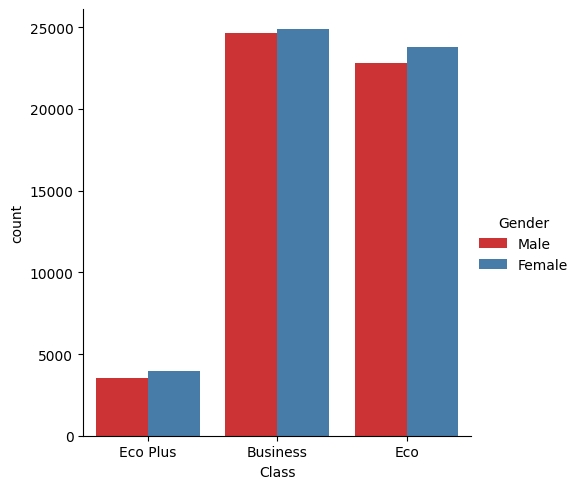

In [57]:
#Class sütunundaki her sınıfın sayısını cinsiyete göre gösteren çubuk grafiği çizildi
sns.catplot(x="Class",kind= "count", hue="Gender",data=df,palette = "Set1")

***MEMNUNİYET ANALİZLERİ***

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


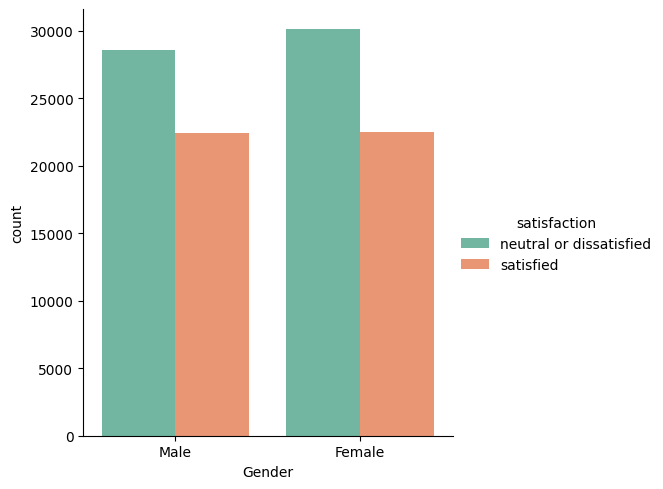

In [58]:
#Gender sütunundaki her cinsiyetin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Gender",kind= "count", hue="satisfaction",data=df,palette = "Set2")

*Cinsiyet ve memnuniyet ilişkisine bakıldığında, kadınların erkeklere oranla memnun olmayan sayısının daha fazla olduğu görülmektedir. Memnun olma oranları ise neredeyse eşit düzeydedir.*

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


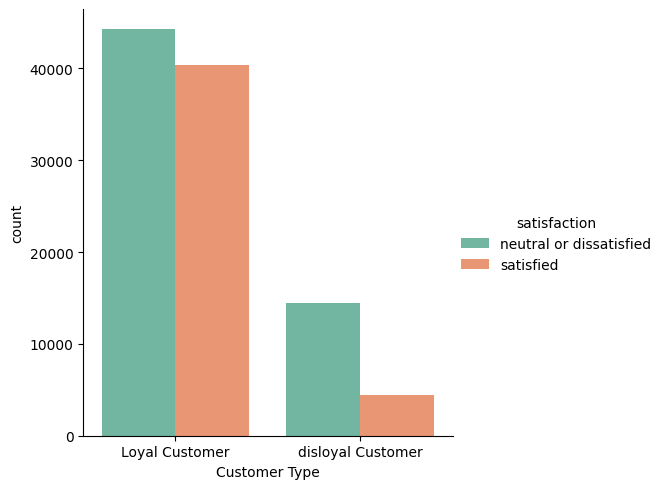

In [59]:
#Customer Type sütunundaki her bir müşteri türünün sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Customer Type",kind= "count", hue="satisfaction",data=df,palette = "Set2")

*Müşteri türü ve memnuniyet ilişkisine bakıldığında, her iki müşteri türünde de memnuniyetsizlik oranının daha fazla olduğu görülmektedir. Ayrıca sadık müşterilerin sadık olmayan müşterilere oranla hem memnuniyet hem memnuniyetsizlik oranı daha fazladır. Sadık olmayan müşterilerde memnuniyet ve memnuniyetsizlik oranı arasında oldukça büyük bir fark vardır.*

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


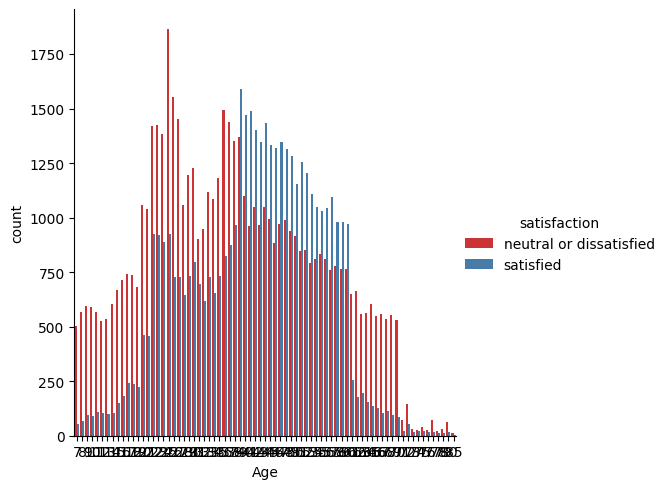

In [60]:
#Age sütunundaki her yaş değerinin kaç kez tekrarlandığı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Age",kind= "count", hue="satisfaction",data=df,palette = "Set1")

*Yaş ve memnuniyet ilişkisine bakıldığında, en yüksek memnuniyet oranlarının 36-50 yaş arası ve 51-65 yaş arasında olduğu görülmektedir.*

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


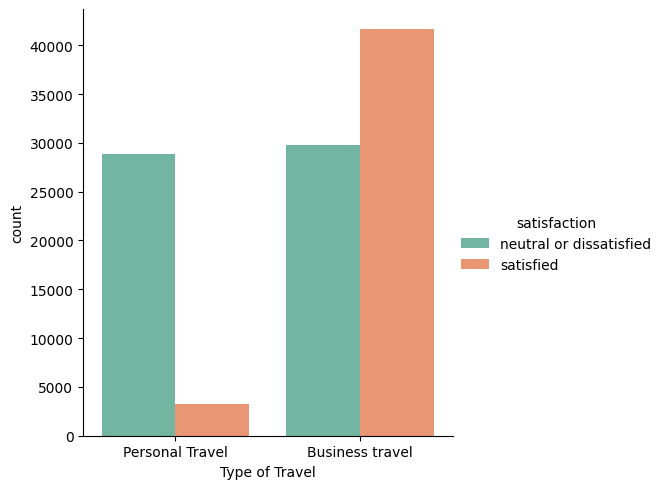

In [61]:
#Type of Travel sütunundakiher bir seyahat türünün sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Type of Travel",kind= "count", hue="satisfaction",data=df,palette = "Set2")

*Seyahat türü ve memnuniyet ilişkisine bakıldığında, her iki seyahat türünde de memnuniyetsizlik oranı birbirine yakındır. Ancak, kişisel seyahat edenlerde memnuniyet oranı oldukça az iken, iş seyahati yapanların memnuniyet oranı oldukça fazladır ve bu değer memnuniyetsizlik oranının da üstündedir.*

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


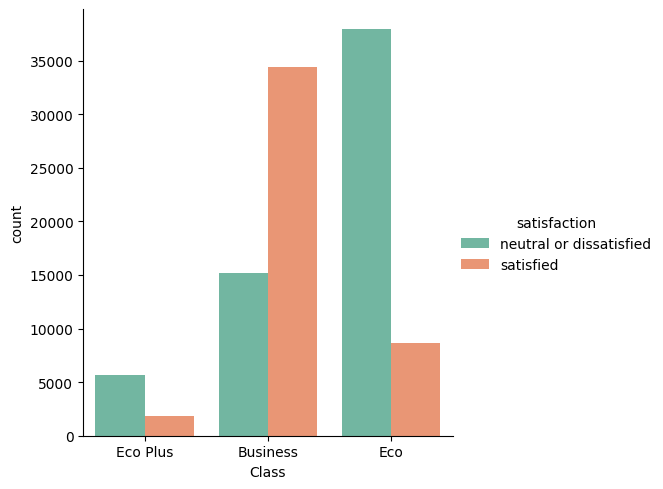

In [62]:
#Class sütunundaki her bir sınıfın sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Class",kind= "count", hue="satisfaction",data=df,palette = "Set2")

*Seyahat sınıfı ve memnuniyet ilişkisine bakıldığında en fazla değerin Eco sınıfındaki memnuniyetsizlik olduğu görülmektedir. Buna en yakın oran Business Class memnuniyet oranıdır. En düşük oranlar ise Eco Plus sınıfında görülmektedir. Bu sınıfta memnuniyetsizlik oranı, memnuniyet oranından fazladır.*

*Bu analiz sınıf ayrımının ne kadar keskin ve belirgin olduğunu ortaya koymaktadır.*

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


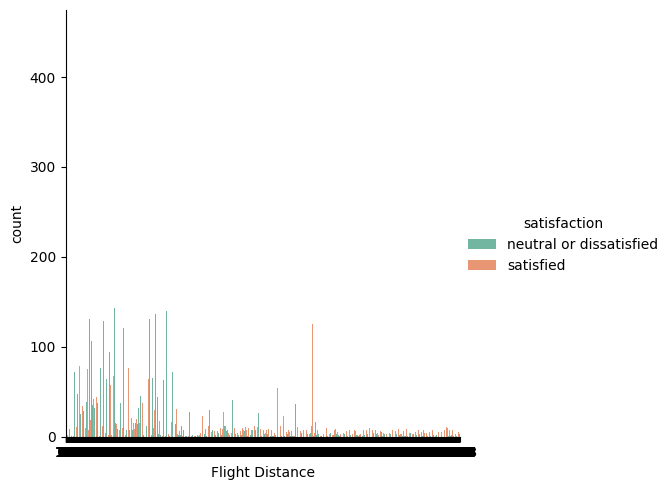

In [63]:
#Flight Distance sütunundaki her mesafe değerinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Flight Distance",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


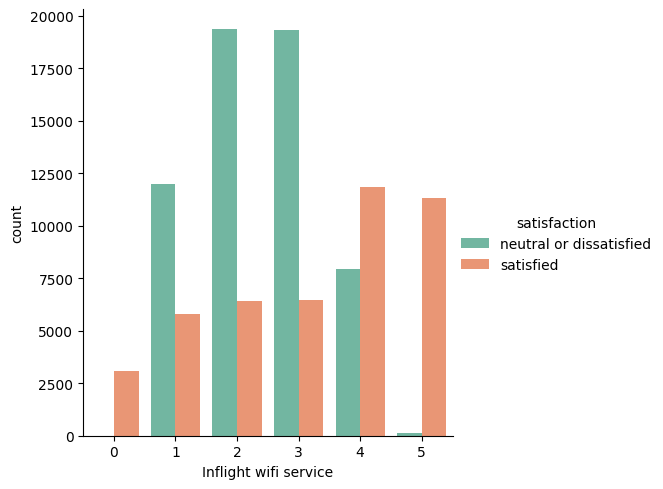

In [64]:
#Inflight wifi service sütunundaki uçak içi wifi hizmeti için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Inflight wifi service",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


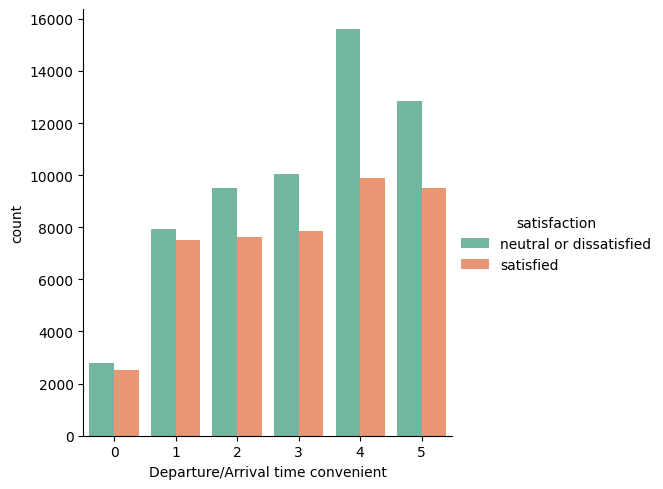

In [65]:
#Departure/Arrival time convenient sütunundaki Kalkış/Varış zamanının uygunluğu için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Departure/Arrival time convenient",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


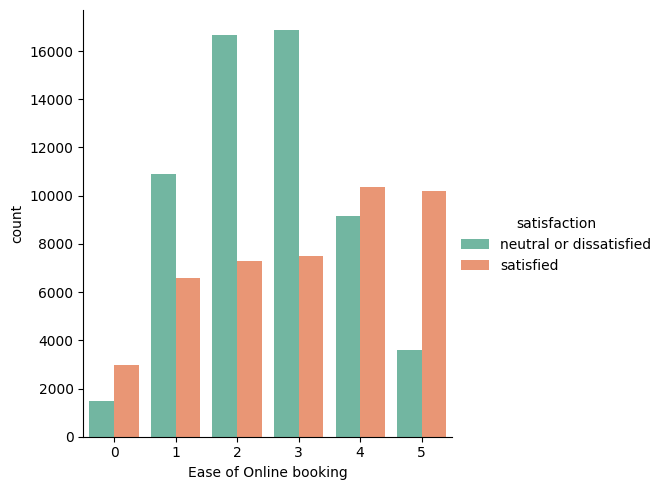

In [66]:
#Ease of Online booking sütunundaki çevrimiçi rezervasyon kolaylığı için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Ease of Online booking",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


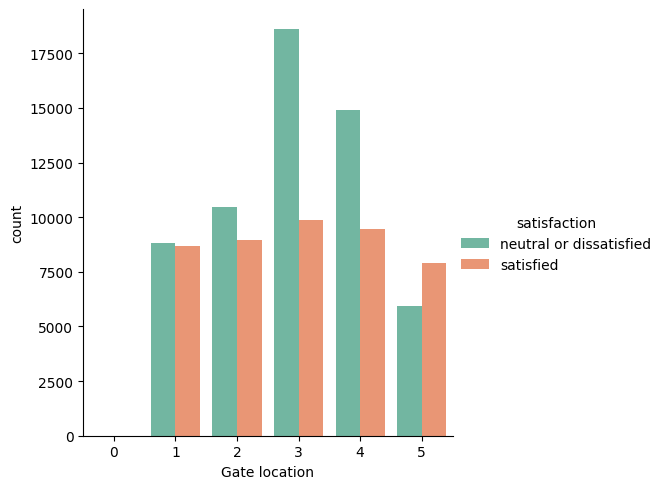

In [67]:
#Gate location sütunundaki kapı konumu için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Gate location",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


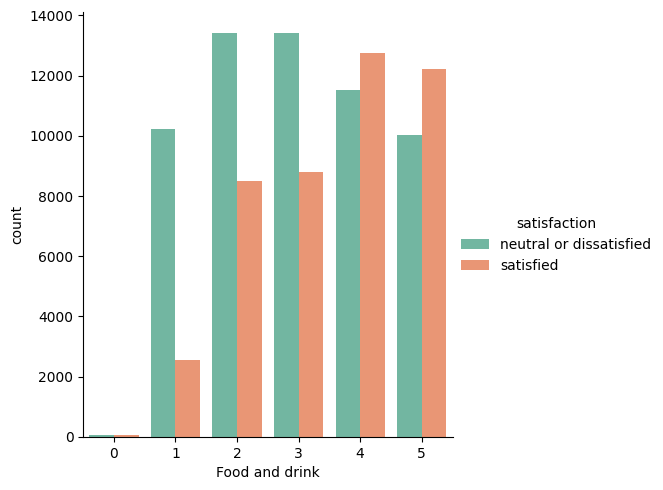

In [68]:
#Food and drink sütunundaki yiyecek ve içecek için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Food and drink",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


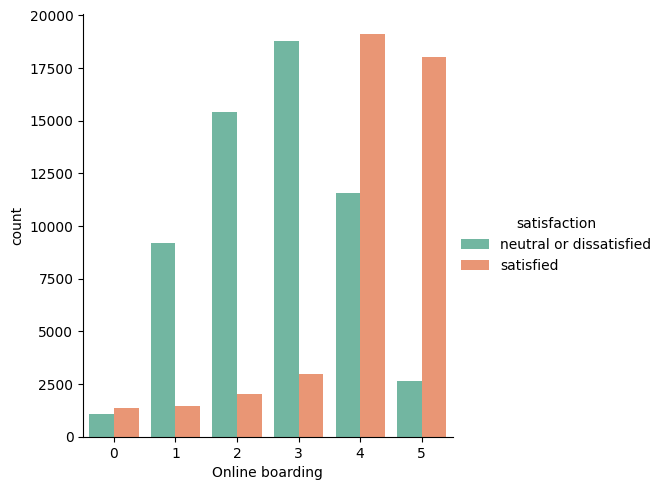

In [69]:
#Online boarding sütunundaki çevrimiçi biniş için her puan seviyesinin sayısı  memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Online boarding",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


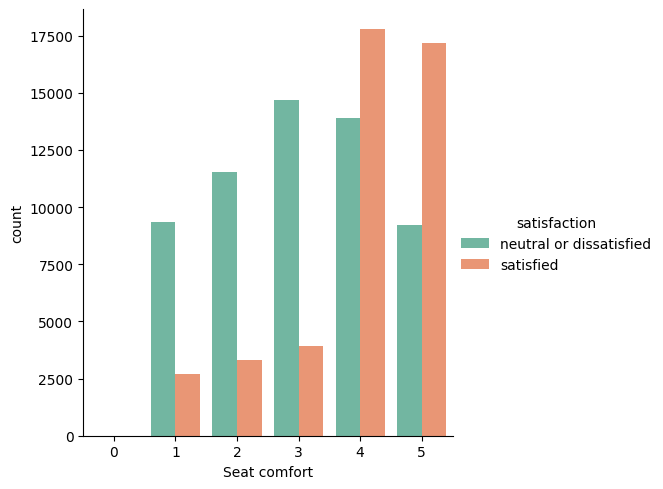

In [70]:
#Seat comfort sütunundaki koltuk konforu için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Seat comfort",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


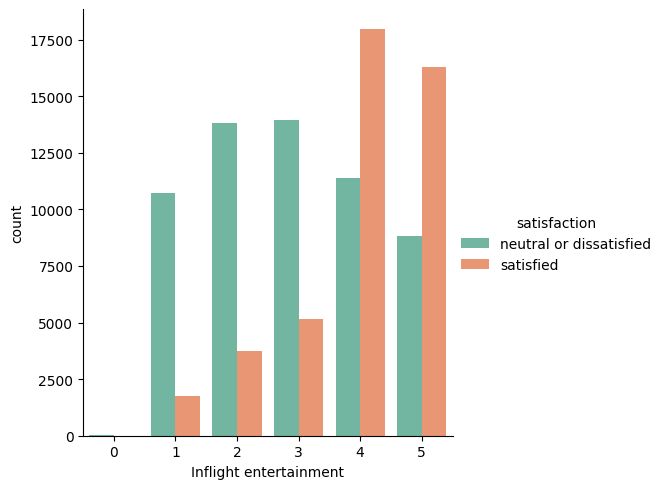

In [71]:
#Inflight entertainment sütunundaki uçuş içi eğlence için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Inflight entertainment",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


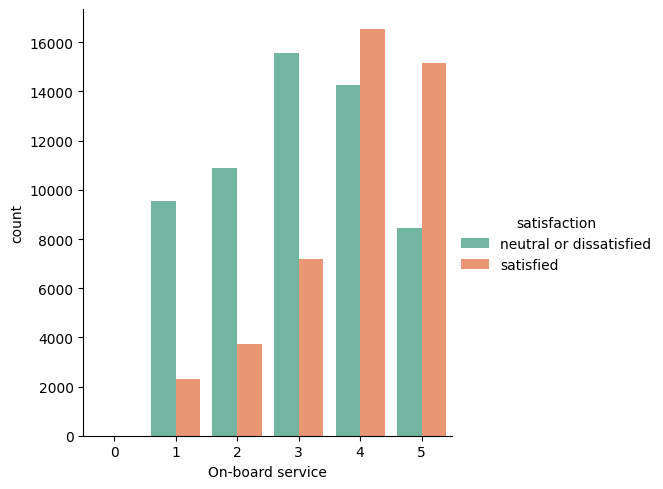

In [72]:
#On-board service sütunundaki uçak içi hizmet için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="On-board service",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


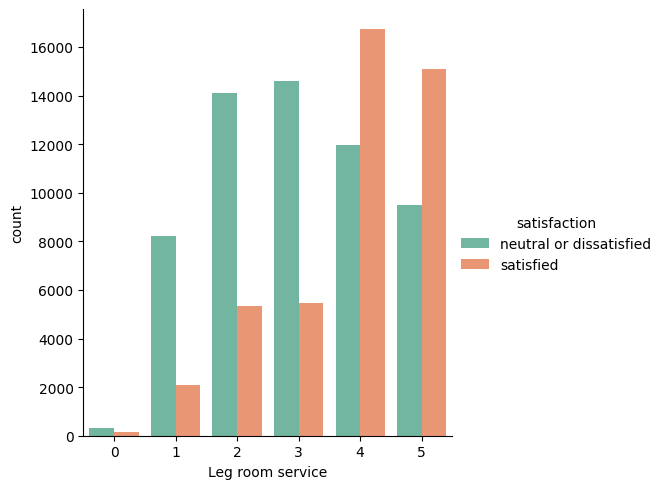

In [73]:
#Leg room service sütunundaki bacak mesafesi hizmeti için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Leg room service",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


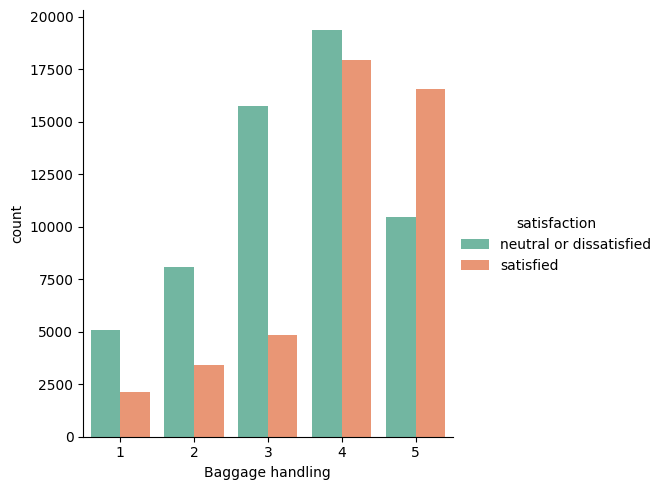

In [74]:
#Baggage handling sütunundaki bagaj işlemleri için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Baggage handling",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


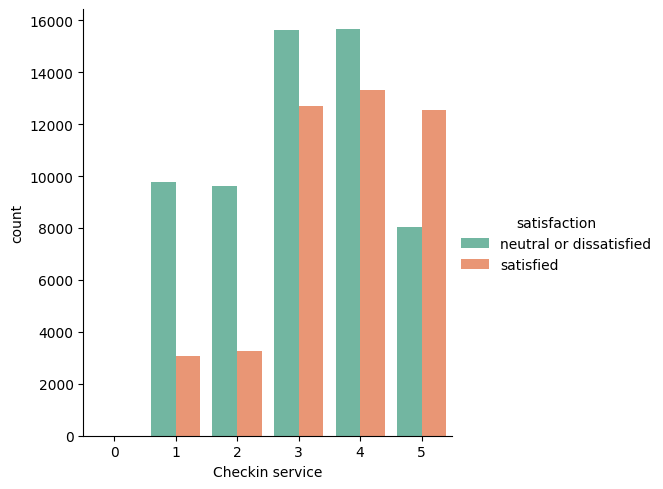

In [75]:
#Check-in service sütunundaki check-in hizmeti için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Checkin service",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


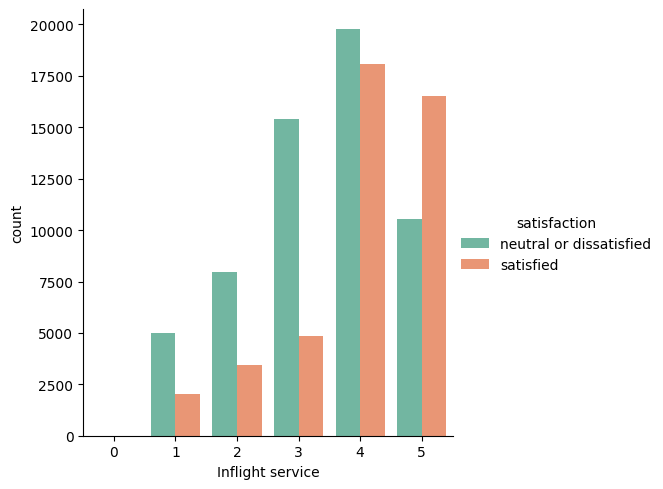

In [76]:
#Inflight service sütunundaki uçuş içi hizmet için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Inflight service",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


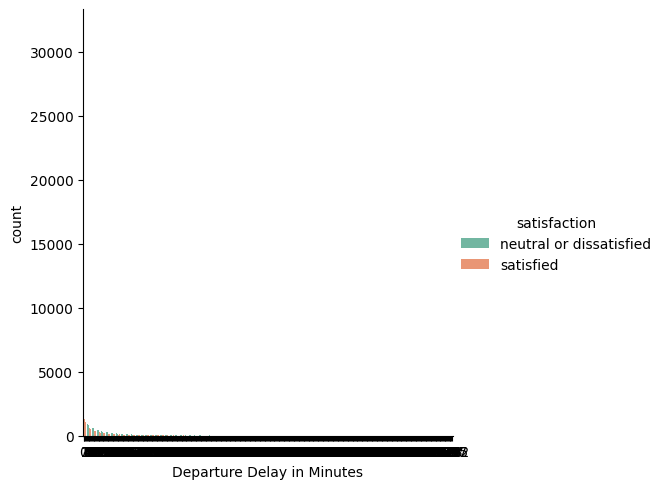

In [77]:
#Departure Delay in Minutes sütunundaki kalkış gecikmesi için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Departure Delay in Minutes",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


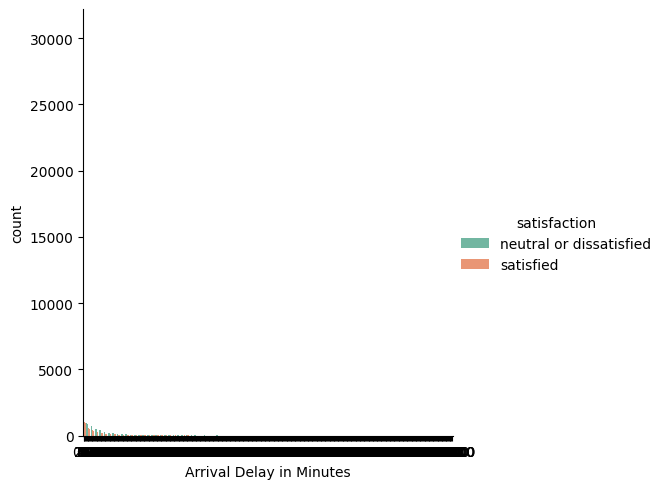

In [78]:
#Arrival Delay in Minutes sütunundaki varış gecikmesi için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="Arrival Delay in Minutes",kind= "count", hue="satisfaction",data=df,palette = "Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


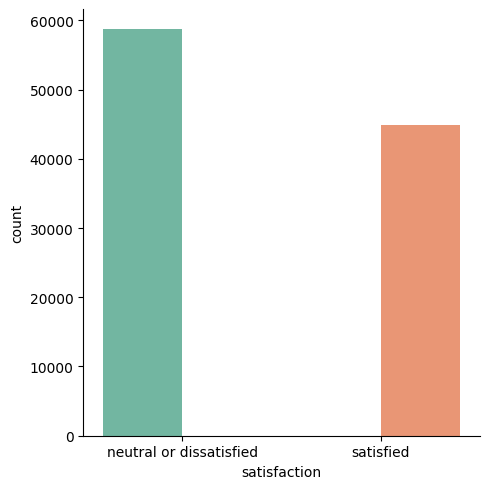

In [79]:
#Satisfaction sütunundaki memnuniyet için her puan seviyesinin sayısı memnuniyet durumuna göre renklerle ayrılarak çubuk grafiğinde gösterildi
sns.catplot(x="satisfaction",kind= "count", hue="satisfaction",data=df,palette = "Set2")

*Genel anlamda bakıldığında memnuniyetsizlik oranının memnuniyete göre daha fazla olduğu görülmektedir.*

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


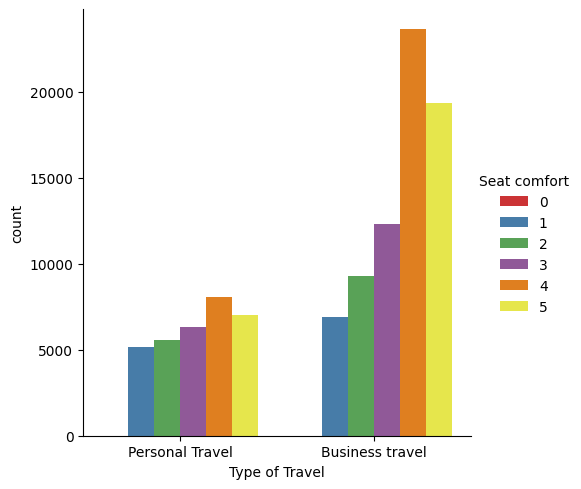

In [80]:
#Type of Travel sütunundakiher seyahat türünün sayısı, koltuk konforu puanlarına göre renklerine ayırılarak çubuk grafik şeklinde gösterildi
sns.catplot(x="Type of Travel",kind= "count", hue="Seat comfort",data=df, palette = "Set1")

<Axes: xlabel='Age', ylabel='Flight Distance'>

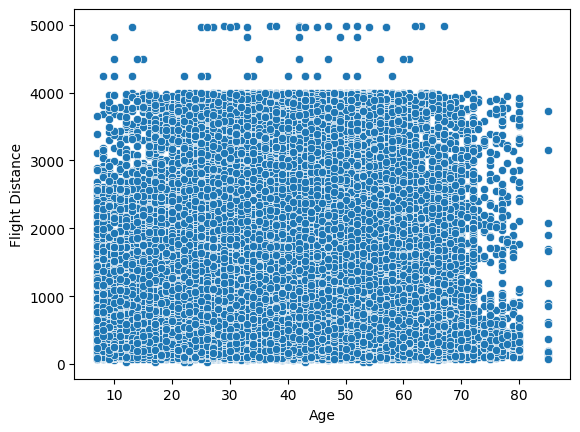

In [81]:
#Age ve Flight Distance sütunları için nokta dağılım grafiği oluşturuldu
sns.scatterplot(x="Age", y= "Flight Distance",data=df)

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

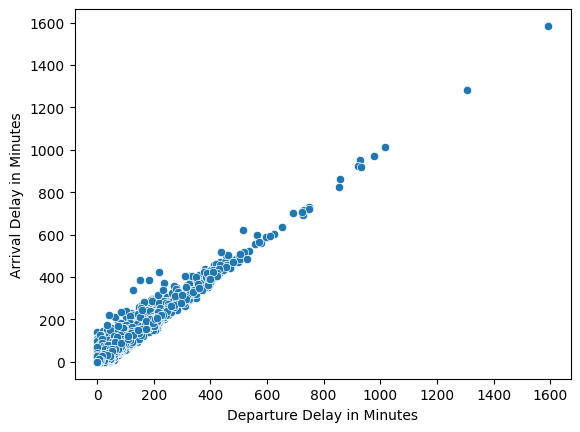

In [82]:
#Departure Delay in Minutes ve Arrival Delay in Minutes sütunları için nokta dağılım grafiği oluşturuldu
sns.scatterplot(x="Departure Delay in Minutes", y= "Arrival Delay in Minutes",data=df)

*Kalkış gecikmesi süresi ve varış gecikmesi süresi arasındaki dağılım grafiğine bakıldığında, kalkış gecikmesi arttıkça varış gecikmesinin de arttığı görülmektedir. Yani uçak geç kalkarsa, büyük olasılıkla geç varıyor. Ayrıca gecikmelerin çoğunun 0–500 dakika aralığında yoğunlaştığı görülmekte. Sağ üstteki birkaç nokta iste oldukça yüksek gecikmeleri göstermektedir.*

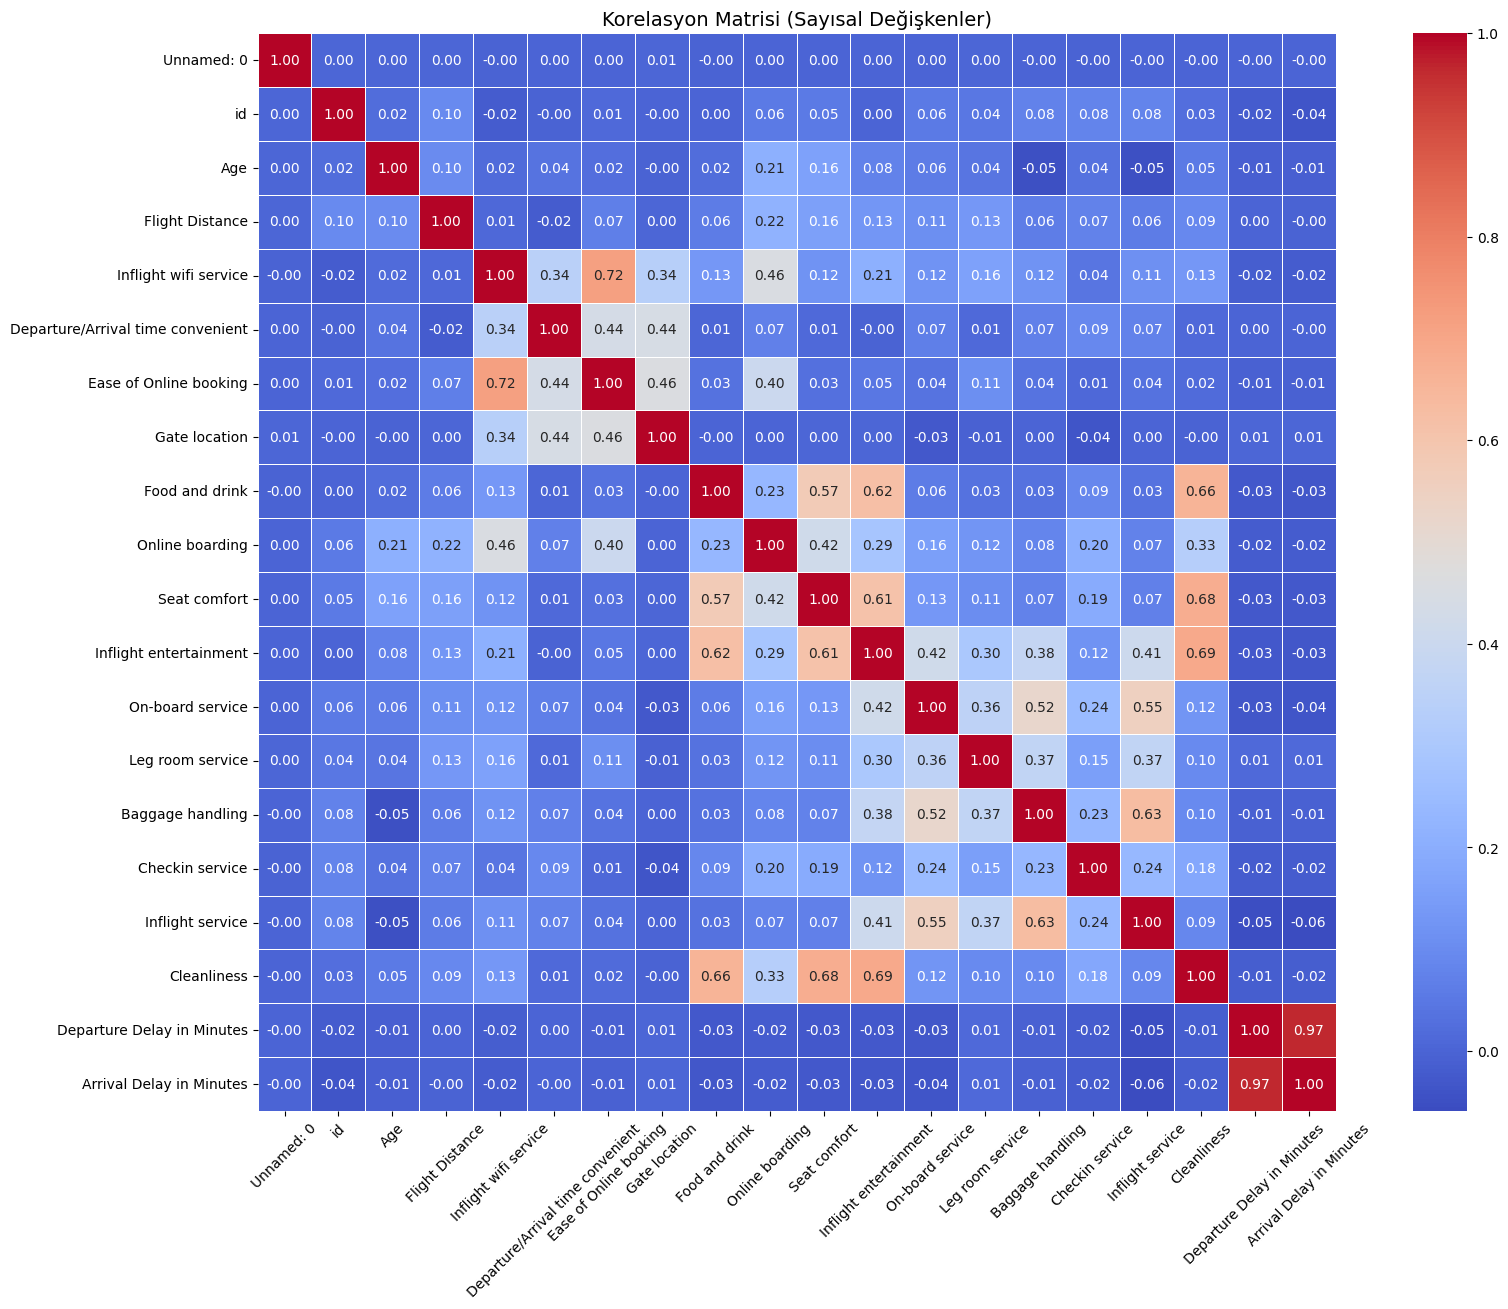

In [97]:
#Korelasyon matrisi çizdirildi
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5, 
            square=True)
plt.title("Korelasyon Matrisi (Sayısal Değişkenler)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


*Korelasyon matrisine bakıldığında, kalkış ve varış gecikmeleri arasında oldukça güçlü korelasyon görülmüştür. Bundan sonra en yüksek korelasyon uçak içi wifi hizmeti ve çevrimiçi biniş arasında gözlemlenmiştir(0.72). Buna yakın şekilde uçuş içi eğlence ve hijyen arasında da ortalamanın üstünde bir korelasyon görülmüştür(0.69).* 